In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import ariel_load
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

local


In [2]:
train_data = kgs.load_all_train_data()
kgs.debugging_mode = 1

0.6777363784736739
[28.93729227 28.74408977 28.35812846 28.13217292 29.61479679 30.97529054
 31.99893449 32.68790431 32.96999877 32.98409838 33.20826458 33.4826215
 33.65709845 33.74272171 33.85436174 34.51150654 35.07679496 35.86240741
 36.77242813 37.15353349 37.426146   38.25656968 38.92929805 40.22450229
 41.61632299 41.56900019 39.85318872 39.51018022 39.35809232 39.29358869
 39.55911093 39.39591309 38.79286333 39.51881692 39.50245225 39.61048789
 39.2831214  38.9896499  38.03612367 36.5608232  36.08849076 36.79360536
 37.01014023 35.98325096 34.97258351 34.94544456 33.75865312 30.83767094
 30.58771094 31.16853931 30.77829102 30.48234696 31.44250892 32.37802829
 31.56478846 31.34271324 33.25913452 33.87530557 32.64101218 31.76891891
 31.66603922 31.31584876 28.83670574 26.13024235 26.30852709 28.03533316
 28.080386   27.08165116 27.87315207 27.42029529 26.48173753 25.00231324
 24.95160321 25.8858755  26.44259206 25.98878906 25.93217194 26.97108833
 27.40121791 26.78181069 26.17566

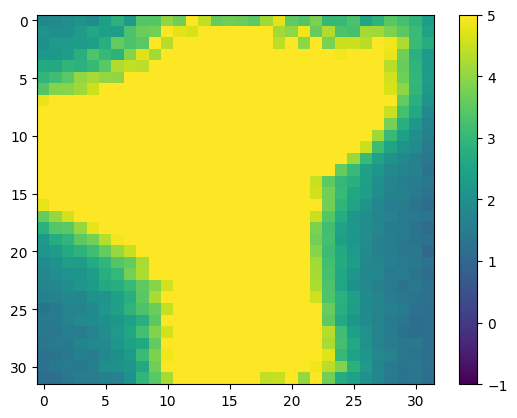

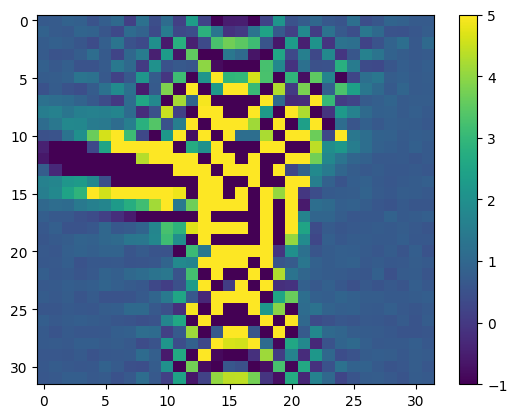

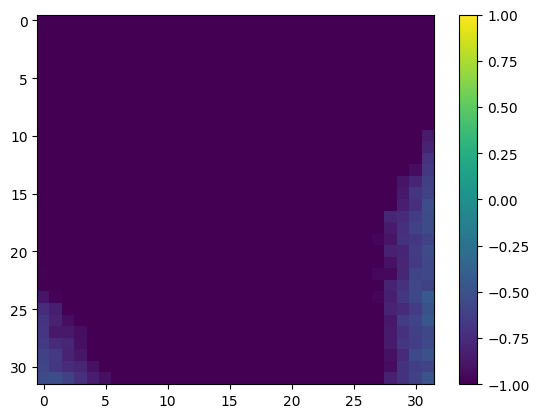

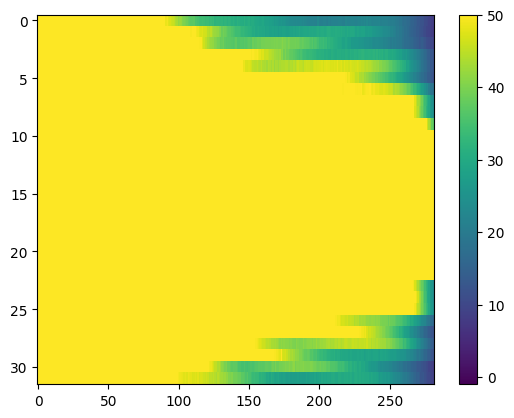

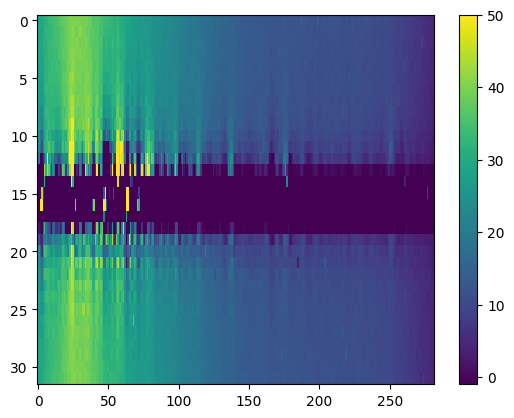

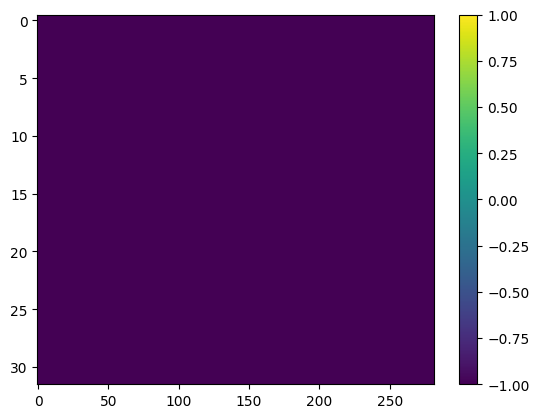

In [4]:
importlib.reload(ariel_load)
d = copy.deepcopy(train_data[0])
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
for ii in range(2):    
    loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
d.load_to_step(0,loaders)
d.load_to_step(5,loaders)

In [4]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
